# [미션] 서울시 아파트 실거래 데이터 시각화

이번 실습에선 지난 미션에서 전처리한 2022년 서울시 아파트 실거래 데이터를 분석하기 위해 다양한 그래프를 그려봅니다.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="AppleGothic")

지난 실습에서 정제한 데이터를 불러옵니다.

In [5]:
df=pd.read_csv("./data/seoul_apart_02.csv")
df.head()

,시군구,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,건축년도,구,동,유형,계약월,계약요일,평당금액
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.12,220000,4,1987.0,강남구,개포동,중형,4,화,9079.65
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.21,220000,2,1987.0,강남구,개포동,중형,4,목,9079.65
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202205,2022.5.27,216000,2,1987.0,강남구,개포동,중형,5,금,8914.57
3,서울특별시 강남구 개포동,개포래미안포레스트,31.01,202204,2022.4.1,369000,13,2020.0,강남구,개포동,대형,4,금,11899.39
4,서울특별시 강남구 개포동,개포래미안포레스트,41.23,202205,2022.5.2,420000,17,2020.0,강남구,개포동,대형,5,월,10186.76


2022년 한해동안 서울에서 거래된 전체 매물의 거래금액을 히스토그램으로 그려보도록 하겠습니다.

### [TODO] 전체 데이터의 거래금액을 히스토그램으로 그려보세요.

* `sns.histplot`을 활용합니다.
* 인자는 `data`, `bins`만 사용합니다.
* `bins`는 30으로 설정합니다.
* 아래와 같은 그래프가 나와야 합니다. 채점을 위해 그래프 제목이나 범주, 축 이름 등은 설정하지 않아야 합니다.

![nn](./image/histplot.png)

* hint: `df["거래금액(만원)"]`을 통해 `df`의 "거래금액(만원)" 컬럼만 추출할 수 있습니다.

<Axes: xlabel='거래금액(만원)', ylabel='Count'>

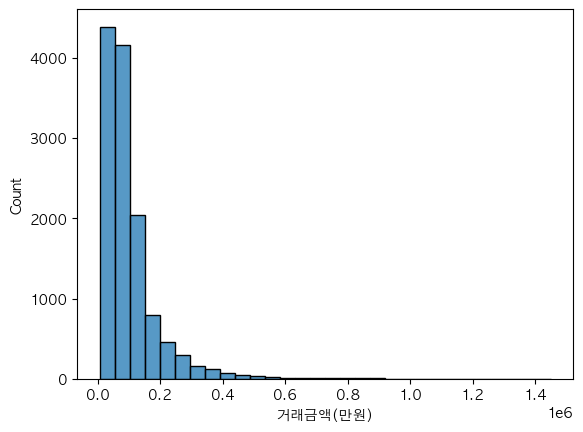

In [11]:
# 그래프를 그리기 위한 코드를 작성하세요
sns.histplot(data = df , x = '거래금액(만원)', bins = 30)


#plt.savefig("problem_1.png") # 채점을 위한 코드입니다.

데이터의 "계약월" 컬럼을 통해 각 월별 부동산 거래의 평당금액 평균값을 확인합니다.

In [12]:
df.groupby("계약월")["평당금액"].mean()

계약월
1     4462.213910
2     4438.818763
3     4711.707969
4     4980.187903
5     4644.528567
6     4733.806339
7     4451.753745
8     4197.408477
9     3906.256034
10    3952.485453
11    4136.439987
12    4219.492341
Name: 평당금액, dtype: float64

이렇게 글자로 확인하는 것 보다 그래프를 활용하면 한눈에 변동을 확인할 수 있습니다.

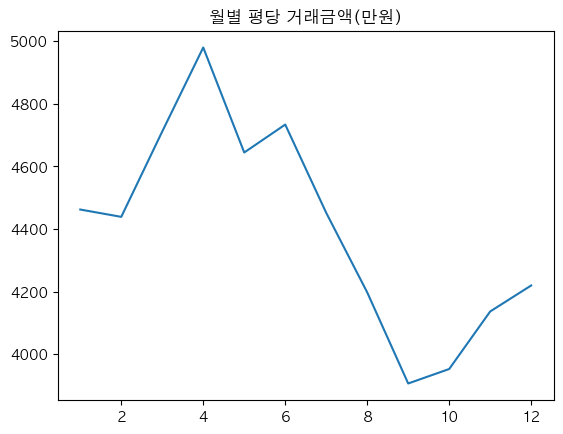

In [13]:
mon_price=df.groupby("계약월")[["평당금액"]].mean()

plt.title("월별 평당 거래금액(만원)")
plt.plot(mon_price["평당금액"])
plt.show()

4월의 거래된 매물의 평균 평당금액이 가장 높고 이후 하락세를 보인것을 확인할 수 있습니다. 

같은 방법으로 월별 거래량도 확인해보도록 하겠습니다.

### [TODO] 월별 아파트 실거래 계약건수 막대그래프를 그려보세요.

* `sns.countplot`을 활용합니다.
* x축은 "계약월"로 합니다.
* 인자는 `data`, `x`만 사용합니다.
* 아래와 같은 그래프가 나와야 합니다. 채점을 위해 그래프 제목이나 범주, 축 이름 등은 설정하지 않아야 합니다.

![nn](./image/countplot.png)

<Axes: xlabel='계약월', ylabel='count'>

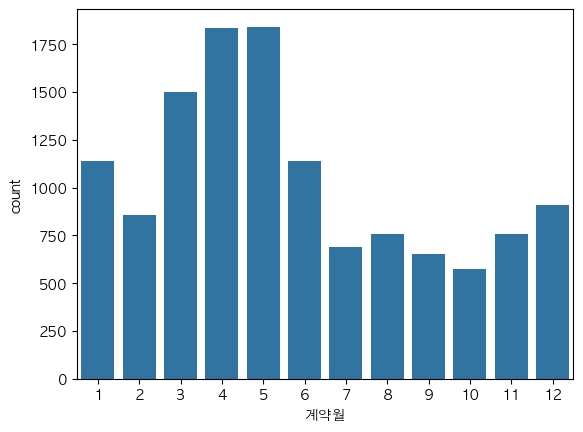

In [15]:
# 그래프를 그리기 위한 코드를 작성하세요
sns.countplot(data = df , x = '계약월')

#plt.savefig("problem_2.png") # 채점을 위한 코드입니다.

4월의 경우 거래량과 거래된 매물의 평당금액이 모두 최상위권인 것을 알 수 있습니다. 4월에 거래된 매물의 평당금액의 분포를 히스토그램으로 그려보도록 하겠습니다.

<Axes: xlabel='평당금액', ylabel='Count'>

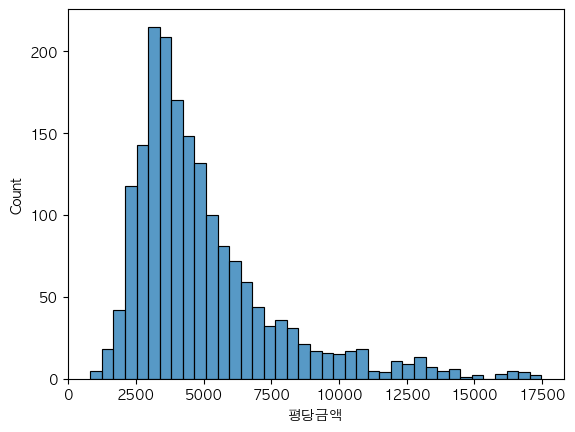

In [16]:
sns.histplot(data=df[df["계약월"]==4]["평당금액"])

이번엔 지역(구)별 거래금액을 비교하기 위해 막대그래프를 활용하겠습니다.

Text(0, 0.5, '평당금액(단위: 만원)')

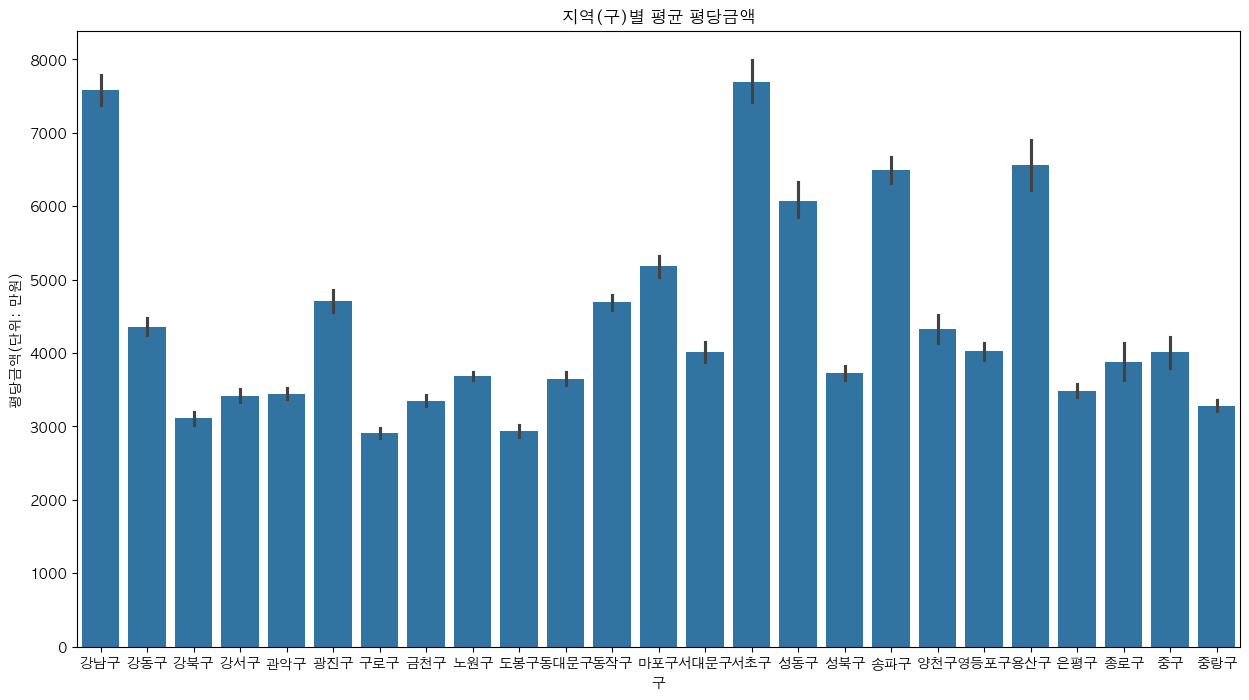

In [17]:
plt.figure(figsize=(15,8))
plt.title("지역(구)별 평균 평당금액")
sns.barplot(data=df, x="구", y="평당금액")
plt.ylabel("평당금액(단위: 만원)")

아파트의 면적에 따라 분류한 "유형"컬럼처럼 범주형 데이터의 경우, 원 그래프를 활용해 비율을 확인할 수 있습니다.

([<matplotlib.patches.Wedge at 0x12b7acda0>,
 [Text(-0.12497366411032125, 1.09287766162496, '소형'),
  Text(-0.3782323446751206, -1.0329280194871087, '중형'),
  Text(0.9500914390866985, -0.5543701447355969, '대형'),
  Text(1.0977953230739024, -0.06960911317540637, '중대형')],
 [Text(-0.06816745315108431, 0.5961150881590691, '53.6%'),
  Text(-0.20630855164097486, -0.5634152833566047, '31.6%'),
  Text(0.5182316940472901, -0.30238371531032554, '12.8%'),
  Text(0.5987974489494012, -0.03796860718658528, '2.0%')])

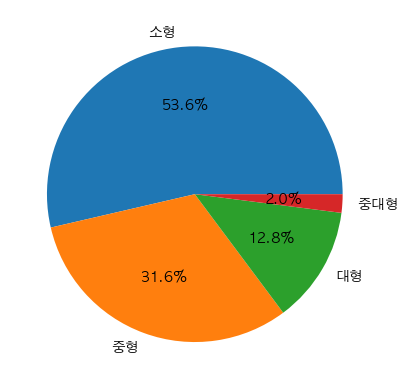

In [18]:
type_ratio=df["유형"].value_counts()
plt.pie(x=type_ratio, labels=type_ratio.index, autopct="%1.1f%%")

이번엔 박스플롯을 활용해 지역구별 평당금액의 분포 및 이상치 정도를 알아보겠습니다.

### [TODO] 지역구별 평당금액의 박스그래프를 그려보세요.

* `sns.boxplot`을 활용합니다.
* x축은 "구", y축은 "평당금액" 으로 합니다.
* 인자는 `data`, `x`, `y`만 사용합니다.
* 아래와 같은 그래프가 나와야 합니다. 채점을 위해 그래프 제목이나 범주, 축 이름 등은 설정하지 않아야 합니다.

![nn](./image/boxplot.png)

<Axes: xlabel='구', ylabel='평당금액'>

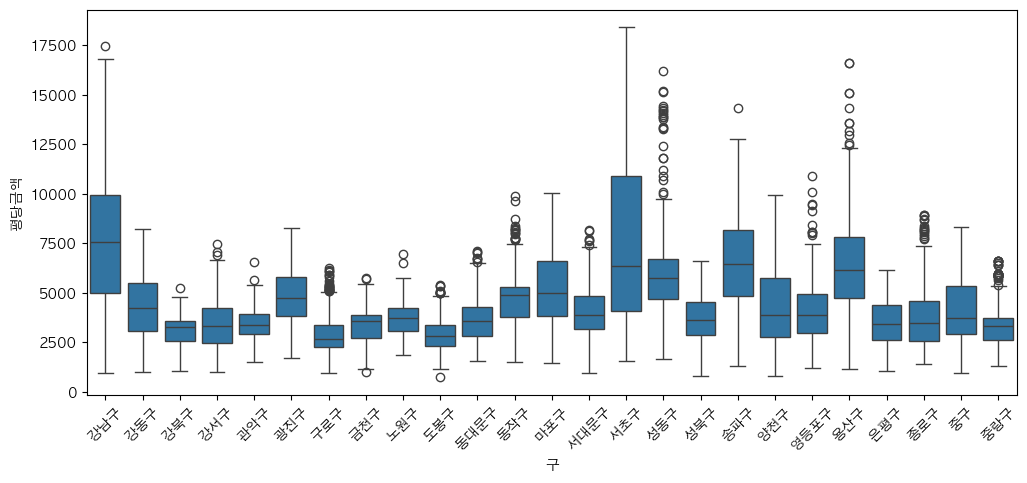

In [19]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45) # 지정된 그래프의 크기와 x축 양식을 사용해주세요. 수정시 채점이 제대로 되지 않을 수 있습니다.
# 그래프를 그리기 위한 코드를 작성하세요
sns.boxplot(data = df , x= '구' , y = '평당금액')


#plt.savefig("problem_3.png") # 채점을 위한 코드입니다.

"성동구"의 경우 다른 지역들보다 상한 이상치가 굉장히 많은것 알 수 있습니다. 이상치 계산식을 활용해 어떤 이상치들이 있는지 확인해봅니다.

In [20]:
q1=df[df["구"]=="성동구"]["평당금액"].quantile(0.25) # 25% 분위수
q3=df[df["구"]=="성동구"]["평당금액"].quantile(0.75) # 75% 분위수
boundary=(q3-q1)*1.5 # 데이터의 정상 범위

df[(df["구"]=="성동구") & (df["평당금액"]>q3+boundary)] # 성동구의 정상치의 상한을 넘는 데이터 추출

,시군구,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,건축년도,구,동,유형,계약월,계약요일,평당금액
8284,서울특별시 성동구 성수동1가,갤러리아포레,73.31,202204,2022.4.28,785000,24,2011.0,성동구,성수동1가,대형,4,목,10707.95
8285,서울특별시 성동구 성수동1가,갤러리아포레,66.02,202206,2022.6.3,880000,42,2011.0,성동구,성수동1가,대형,6,금,13329.29
8293,서울특별시 성동구 성수동1가,신장미,20.81,202204,2022.4.6,227000,2,1983.0,성동구,성수동1가,중형,4,수,10908.22
8297,서울특별시 성동구 성수동1가,아크로서울포레스트,50.06,202204,2022.4.13,620000,6,2020.0,성동구,성수동1가,대형,4,수,12385.14
8298,서울특별시 성동구 성수동1가,아크로서울포레스트,80.17,202209,2022.9.30,1300000,47,2020.0,성동구,성수동1가,대형,9,금,16215.54
8300,서울특별시 성동구 성수동1가,트리마제,15.05,202201,2022.1.5,207000,15,2017.0,성동구,성수동1가,소형,1,수,13754.15
8301,서울특별시 성동구 성수동1가,트리마제,25.70,202201,2022.1.29,303000,3,2017.0,성동구,성수동1가,중형,1,토,11789.88
8302,서울특별시 성동구 성수동1가,트리마제,21.13,202203,2022.3.7,249500,6,2017.0,성동구,성수동1가,중형,3,월,11807.86
8303,서울특별시 성동구 성수동1가,트리마제,7.68,202203,2022.3.26,109000,16,2017.0,성동구,성수동1가,소형,3,토,14192.71
8304,서울특별시 성동구 성수동1가,트리마제,10.74,202204,2022.4.5,155000,3,2017.0,성동구,성수동1가,소형,4,화,14432.03


성동구의 경우 특정 아파트가 거래가의 이상치를 대부분 차지하고 있는 것을 알 수 있습니다.

이번에는 "전용면적(평)" 컬럼과 "거래금액(만원)" 컬럼의 상관관계를 산점도로 그려보겠습니다.

### [TODO] "전용면적(평)" 컬럼과 "거래금액(만원)" 컬럼의 상관관계를 산점도로 그려보세요.

* `sns.scatterplot`을 활용합니다.
* x축은 "전용면적(평)", y축은 "거래금액(만원)" 으로 합니다.
* 인자는 `data`, `x`, `y`만 사용합니다.
* 아래와 같은 그래프가 나와야 합니다. 채점을 위해 그래프 제목이나 범주, 축 이름 등은 설정하지 않아야 합니다.

![nn](./image/scatterplot.png)

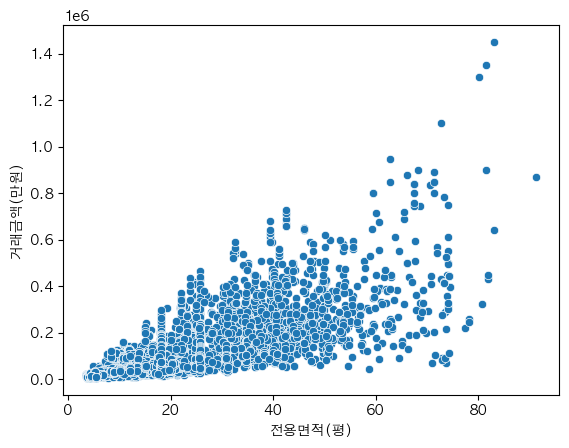

In [21]:
# 그래프를 그리기 위한 코드를 작성하세요
sns.scatterplot(data = df, x = '전용면적(평)', y = '거래금액(만원)')


#plt.savefig("problem_4.png") # 채점을 위한 코드입니다.

"거래금액(만원)"과 "전용면적(평)"컬럼이 매우 밀접한 관계를 보이는 것을 확인할 수 있습니다. 대부분의 경우 넓은 집이 비싸다는 사실을 확인할 수 있습니다.

이번에는 전체 수치형 데이터끼리의 상관계수를 히트맵으로 표현해보겠습니다.

<Axes: >

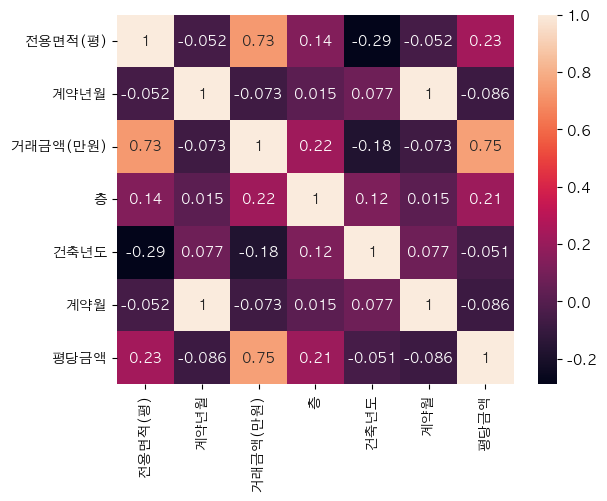

In [22]:
df_corr=df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)

몇몇 경우를 제외하면 전체적으로 변수들끼리 낮은 상관관계를 보이는 것을 확인할 수 있습니다. 아파트의 가격에 영향을 미치는 요인은 정말 많기 때문에 한두개의 변수로는 설명하기 어렵다는 사실을 알 수 있습니다.